# EDA

In [1]:
import seaborn as sns
import string
import re
from collections import Counter
import matplotlib.pyplot as plt
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
import pandas as pd

## Tokening the Data 

In [634]:
import string
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Create our list of punctuation marks
punctuations = string.punctuation
nlp.Defaults.stop_words |= {'four more years','[laughter','audience members','applause','president', 'the president', 'laughter','sanders'}

punctuations=punctuations+'—'+'–'+'--'

In [450]:
# Create our list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [451]:
# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

In [452]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [word.lemma_.lower().strip() if word.lemma_ !=
                "-PRON-" else word.lower_ for word in mytokens]

    # Removing stop words
    mytokens = [word for word in mytokens if word not in stop_words]
    
    #Removing punctuations
    mytokens = [word for word in mytokens if word not in punctuations]

    mytokens = ' '.join(mytokens)
    # return preprocessed list of tokens
    return mytokens

## Stop Words and Punctuations

In [354]:
import string
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Create our list of punctuation marks
punctuations = string.punctuation
punctuations=punctuations+'—'+'–'+'--'

In [356]:
# Create our list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS


In [389]:
nlp.Defaults.stop_words |= {'four more years','[laughter','audience members','applause','president', 'the president', 'laughter','applause','[applause','[booing','clinton','[cheers'}


In [341]:
# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

## General EDA on the Dataset

In [491]:
campaign_speeches=pd.read_csv('Campaign Speeches')

In [492]:
campaign_speeches.head()

,candidate,date,speech title,text,party,won_nomination,sentiment_score,positive,negative
0,Robert Dole,1995-04-10,Remarks Announcing Candidacy for the Republica...,"Thank you, Governor Graves, Senator Kassebaum....",Republican,1,"{'neg': 0.088, 'neu': 0.736, 'pos': 0.175, 'co...",0.175,0.088
1,Robert Dole,1995-05-31,"Remarks in Los Angeles: ""Hollywood Speech""",I want to talk about a specific matter tonight...,Republican,1,"{'neg': 0.143, 'neu': 0.657, 'pos': 0.2, 'comp...",0.200,0.143
2,Robert Dole,1995-06-17,Remarks to the United States Conference of May...,"Thank you, Senator Kempthorne, and thank you a...",Republican,1,"{'neg': 0.12, 'neu': 0.711, 'pos': 0.17, 'comp...",0.170,0.120
3,Robert Dole,1995-08-19,Remarks at the Iowa Straw Poll in Ames,"Thank you, Dan Quayle , for that great introdu...",Republican,1,"{'neg': 0.103, 'neu': 0.717, 'pos': 0.181, 'co...",0.181,0.103
4,Robert Dole,1995-09-04,Remarks at the American Legion Convention in I...,"Thank you, and thank you very much, Commander ...",Republican,1,"{'neg': 0.103, 'neu': 0.725, 'pos': 0.172, 'co...",0.172,0.103


In [493]:
campaign_speeches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 9 columns):
candidate          1692 non-null object
date               1692 non-null object
speech title       1692 non-null object
text               1691 non-null object
party              1692 non-null object
won_nomination     1692 non-null int64
sentiment_score    1692 non-null object
positive           1692 non-null float64
negative           1692 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 119.0+ KB


In [494]:
campaign_speeches[campaign_speeches.text.isnull()==True]

,candidate,date,speech title,text,party,won_nomination,sentiment_score,positive,negative
1132,Newt Gingrich,2012-05-01,Videotaped Remarks Announcing the End of Presi...,NaN,Republican,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0


In [495]:
campaign_speeches=campaign_speeches.dropna(subset=['text'])

In [496]:
campaign_speeches.shape

(1691, 9)

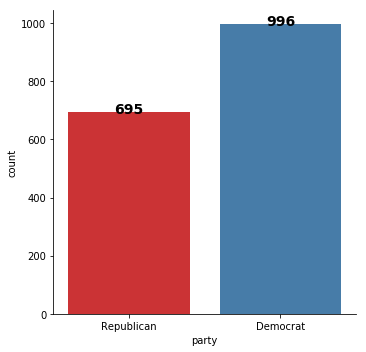

In [497]:
plot = sns.catplot(x="party", kind="count", data=campaign_speeches,palette='Set1')

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i,  # bar index (x coordinate of text)
        h+10,  # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center',
        va='center',
        fontweight='bold',
        size=14)

In [498]:
campaign_speeches.won_nomination.value_counts()

1    1120
0     571
Name: won_nomination, dtype: int64

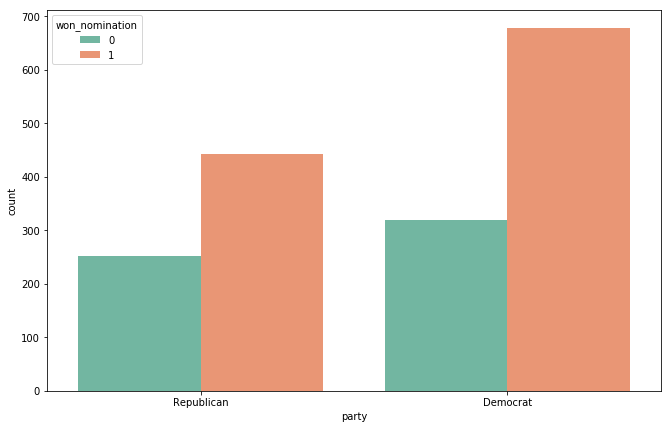

In [499]:
plt.figure(figsize=(11,7))
sns.countplot(x='party',hue='won_nomination',data=campaign_speeches,palette="Set2")

## Candidate EDA

In [391]:
def candidate_eda(candidate, pos, n):

    candidate_speeches = campaign_speeches[(
        campaign_speeches.candidate == candidate)].reset_index(drop=True)

    candidate_speeches['tokenized_text'] = candidate_speeches.text.apply(
        lambda x: spacy_tokenizer(x))

    candidate_tokenized_text = [
        text for text in candidate_speeches['tokenized_text']]

    candidate_tokenized_text = ' '.join(candidate_tokenized_text).split()

    candidate_counts = Counter(candidate_tokenized_text)

    candidate_common_words = [word[0]
                              for word in candidate_counts.most_common(n)]

    candidate_common_counts = [word[1]
                               for word in candidate_counts.most_common(n)]

    print(candidate_counts.most_common(n))
    fig1 = plt.figure(figsize=(18, 6))
    sns.barplot(x=candidate_common_words, y=candidate_common_counts)
    plt.title("Most Common Words used in the {}'s Speeches".format(candidate))
    plt.xticks(rotation=45, fontsize=12)
    plt.show()

    nlp.max_length = 10000000
    candidate_text = [text for text in candidate_speeches.text]
    candidate_text = ' '.join(candidate_text).strip()

    candidate_nlp = nlp(candidate_text)
    candidate_ents = candidate_nlp.ents

    entities = []
    # named entities
    for ent in candidate_ents:
        # Print the entity text and its label
        if ent.label_ == 'GPE' or ent.label_ == 'PERSON' or ent.label_ == 'LOC' or ent.label_ == 'ORG' or ent.label_ == 'EVENT':
            entities.append(str(ent))

    entities = [word for word in entities if word.lower() not in stop_words]

    counter = Counter(entities)
    result = counter.most_common(n)

    print("top {} entities {}".format(n, result))
    fig2 = plt.figure(figsize=(12, 18))

    sns.barplot([i[1] for i in result], ["\"{}\"".format(i[0])
                                         for i in result])
    plt.ylabel('named entity')
    plt.xlabel('total')
    plt.xticks(rotation='horizontal', fontsize=10)
    plt.title("Top {} named entities".format(n))
    plt.subplots_adjust(bottom=0.40)
    plt.show()

    phrases = [np.text for np in candidate_nlp.noun_chunks if len(np)>2]
    phrases = [word for word in phrases if word.lower() not in stop_words]

    counter1 = Counter(phrases)
    result1 = (counter1.most_common(n))

    fig3 = plt.figure(figsize=(12, 18))
    sns.barplot([i[1] for i in result1], ["\"{}\"".format(i[0])
                                          for i in result1])
    plt.ylabel('phrase')
    plt.xlabel('total')
    plt.xticks(rotation='horizontal', fontsize=10)
    plt.title("Top {} named phrases".format(n))
    plt.subplots_adjust(bottom=0.40)
    plt.show()

    positions=[]
    for token in candidate_nlp:
        # ignore stop words
        
        if token.pos_ == pos:
            positions.append(token.text)
    
    positions= [word for word in positions if word.lower() not in stop_words]
    # sort by values, but before get only those keys where value > 1;
    # I want lemmas that appear more than one lastly, get the first n results
    counter2 = Counter(positions)
    result2 = (counter2.most_common(n))

    print("top {} {} {}".format(n,pos, result2))
    fig4 = plt.figure(figsize=(18, 6))
    sns.barplot(["\"{}\"".format(i[0])
                 for i in result2], [i[1] for i in result2])
    plt.title("Top {}s used in {}'s Speeches".format(pos, candidate))
    plt.ylabel('total')
    plt.xlabel('term')
    plt.xticks(rotation=45, fontsize=12)
    plt.show()

### Obama

[('work', 5788), ('people', 5709), ('american', 5382), ('know', 5091), ('want', 4797), ('year', 4758), ('america', 4624), ('job', 4401), ('country', 4400), ('need', 4065), ('time', 3933), ('think', 3687), ('right', 3262), ('good', 3245), ('come', 3220), ('change', 3069), ('new', 2952), ('tax', 2781), ('like', 2706), ('sure', 2642), ('believe', 2620), ('help', 2569), ('pay', 2476), ('thing', 2456), ('economy', 2403)]


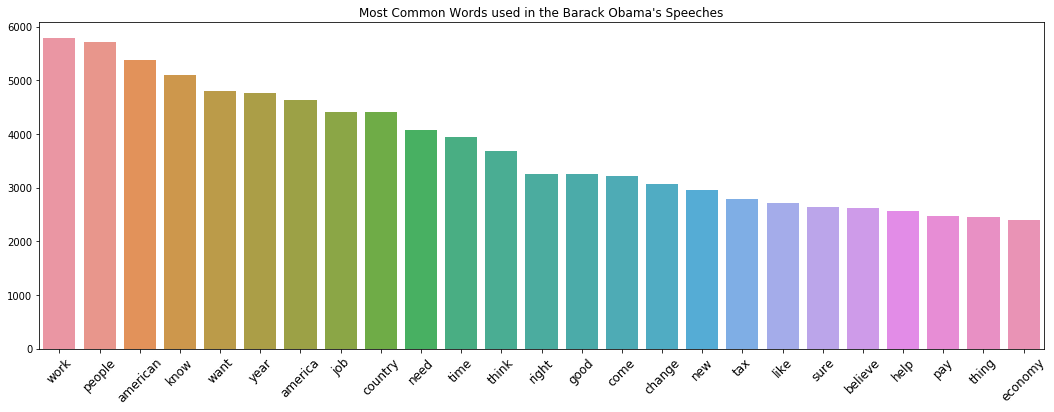

top 25 entities [('America', 3708), ('Washington', 1332), ('Iraq', 1227), ('the United States of America', 791), ('the United States', 750), ('Congress', 741), ('Romney', 678), ('McCain', 551), ('Afghanistan', 525), ('John McCain', 482), ('Ohio', 448), ('Michelle', 392), ('Medicare', 379), ('Iowa', 373), ('Earth', 335), ('Bush', 329), ('Chicago', 303), ('Obama', 263), ('Iran', 255), ('Florida', 253), ('China', 247), ('Israel', 233), ('State', 228), ('Senate', 225), ('Bill Clinton', 216)]


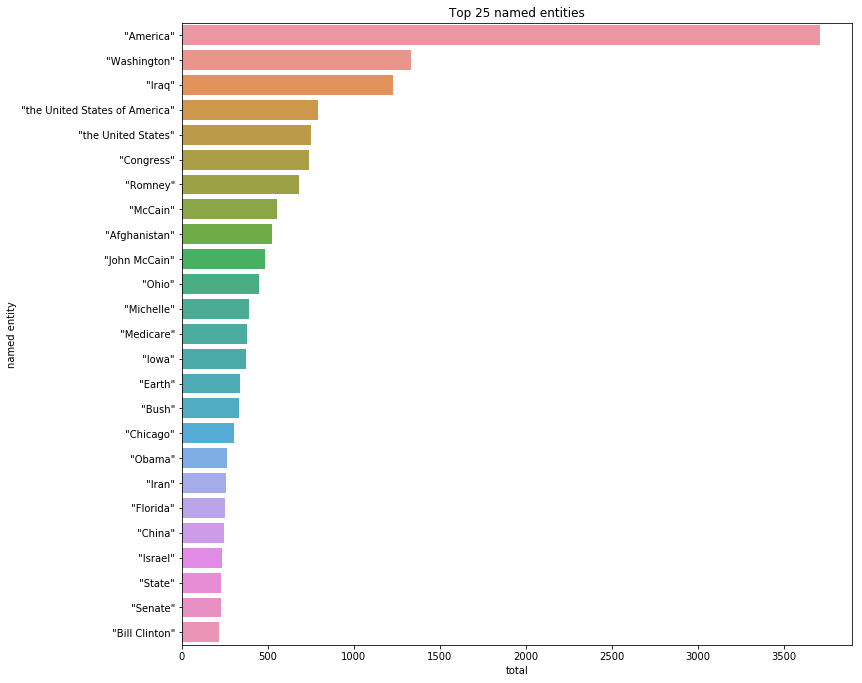

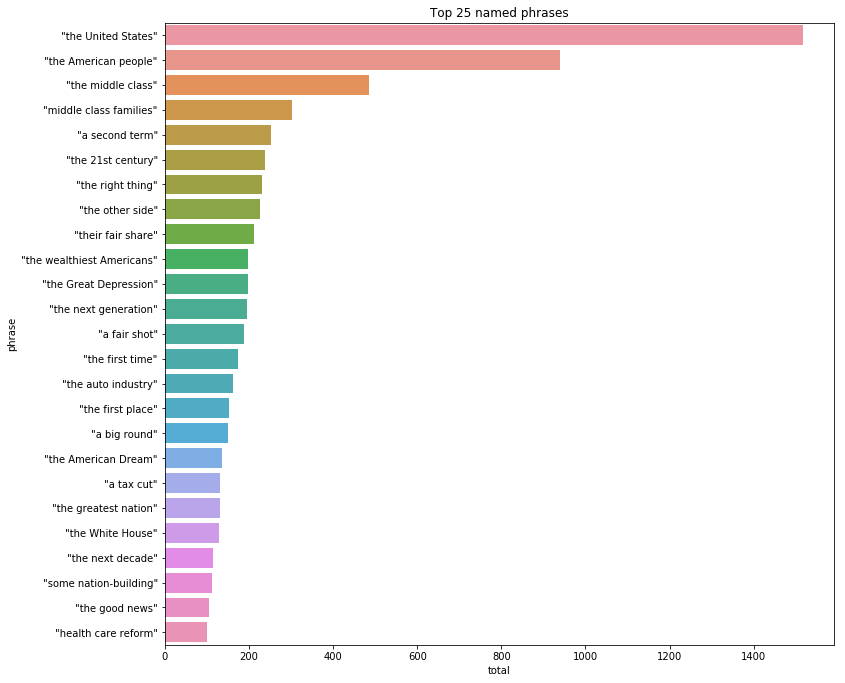

top 25 NOUN [('people', 5542), ('country', 4126), ('years', 3554), ('time', 3303), ('jobs', 3130), ('tax', 2555), ('economy', 2383), ('health', 2140), ('everybody', 2010), ('way', 1982), ('care', 1979), ('world', 1911), ('work', 1885), ('folks', 1877), ('plan', 1873), ('change', 1743), ('election', 1650), ('class', 1625), ('energy', 1532), ('families', 1489), ('war', 1416), ('education', 1409), ('lot', 1407), ('college', 1397), ('things', 1325)]


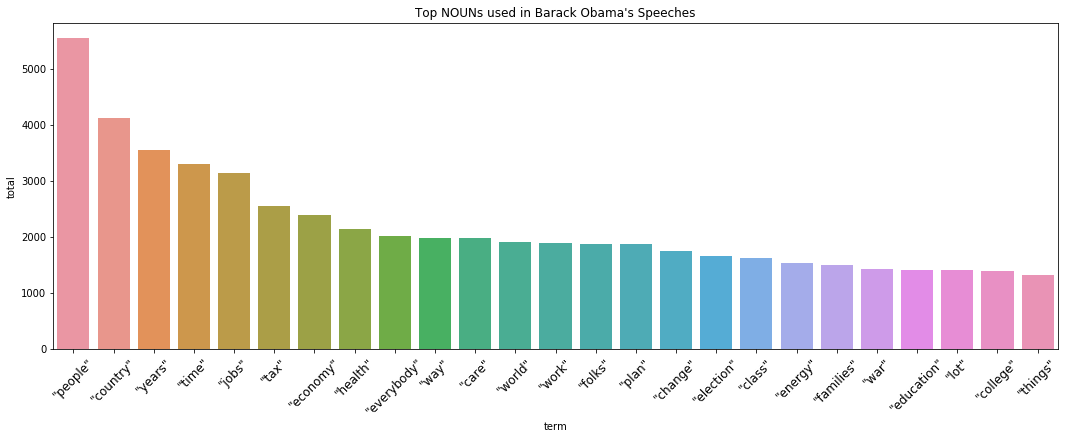

In [394]:
candidate_eda('Barack Obama','NOUN',25)

### Trump

[('people', 1455), ('country', 1415), ('american', 1318), ('hillary', 1083), ('job', 1024), ('know', 841), ('want', 801), ('great', 797), ('america', 717), ('new', 592), ('like', 559), ('year', 548), ('time', 524), ('right', 500), ('trump', 461), ('come', 451), ('work', 435), ('think', 435), ('happen', 415), ('deal', 410), ('world', 409), ('state', 407), ('good', 398), ('look', 389), ('win', 385)]


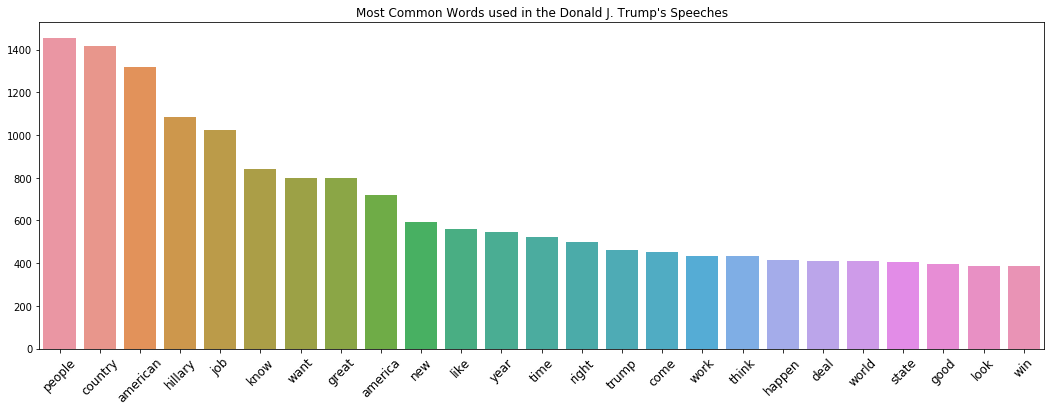

top 25 entities [('Hillary Clinton', 664), ('America', 524), ('Hillary', 296), ('the United States', 267), ('ISIS', 197), ('Obama', 196), ('China', 187), ('Donald Trump', 169), ('Mexico', 165), ('Obamacare', 162), ('Trump', 156), ('NAFTA', 132), ('Washington', 114), ('Iran', 103), ("Hillary Clinton's", 103), ('Congress', 99), ('FBI', 97), ('Iraq', 94), ('Russia', 88), ('the Middle East', 83), ('State', 79), ('Michigan', 76), ('Syria', 70), ('Pennsylvania', 65), ('Trump Administration', 65)]


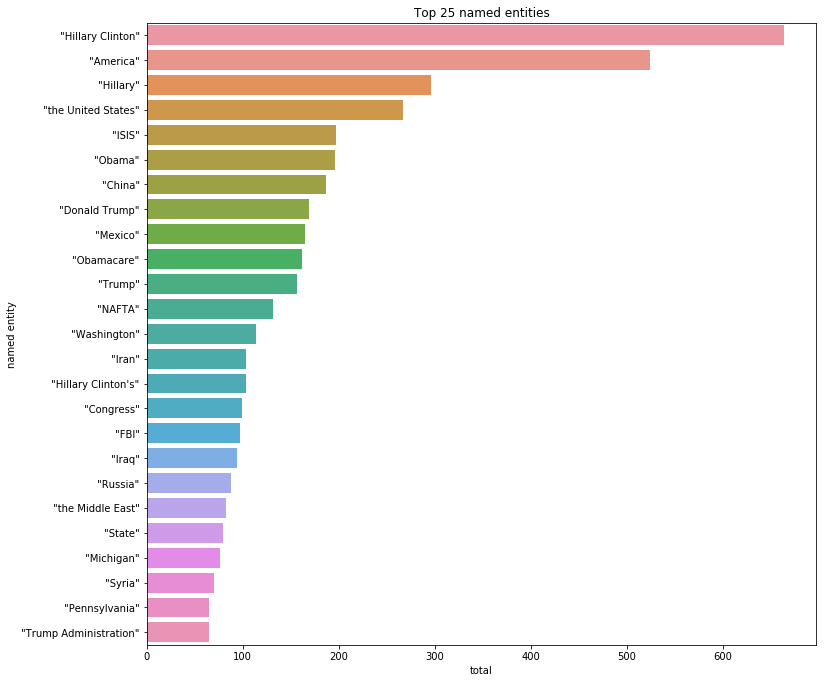

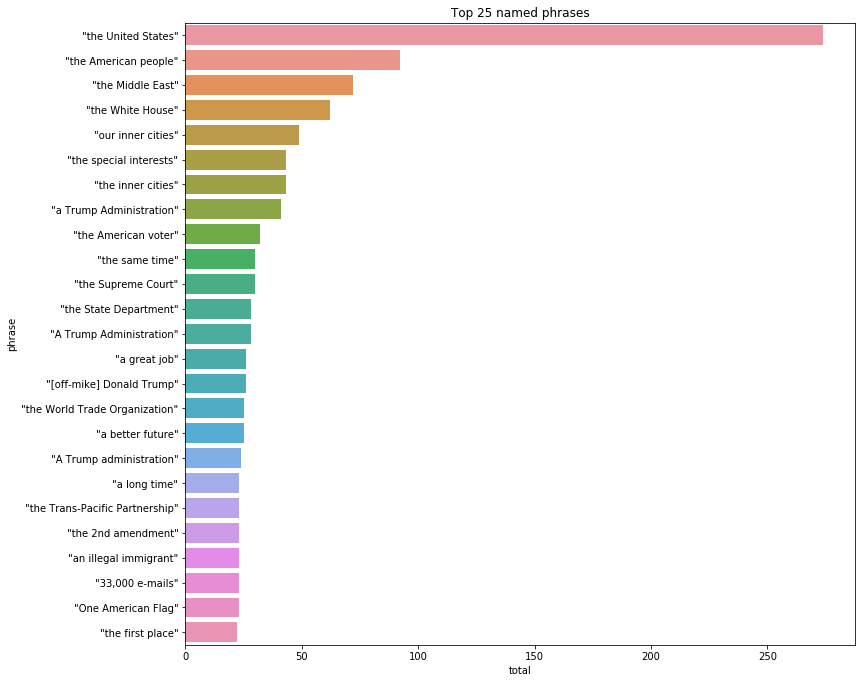

top 25 NOUN [('people', 1356), ('country', 1196), ('jobs', 794), ('time', 417), ('world', 335), ('years', 334), ('government', 320), ('way', 316), ('trade', 305), ('percent', 290), ('money', 276), ('plan', 267), ('nation', 253), ('deal', 227), ('job', 227), ('tax', 221), ('things', 220), ('system', 219), ('countries', 216), ('year', 214), ('immigration', 206), ('state', 184), ('law', 184), ('lot', 183), ('day', 182)]


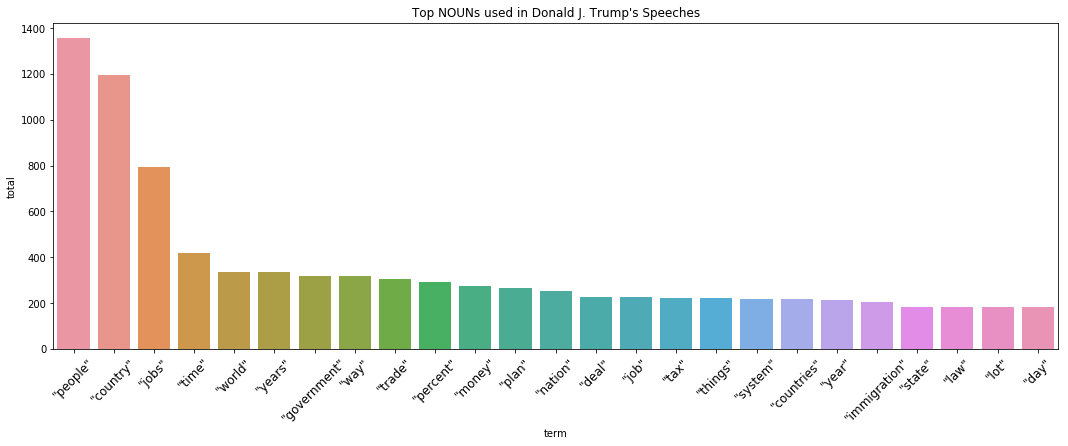

In [392]:
candidate_eda('Donald J. Trump','NOUN',25)

### Hillary

[('know', 3701), ('people', 3514), ('work', 2820), ('think', 2492), ('want', 2468), ('need', 1810), ('american', 1743), ('country', 1661), ('year', 1623), ('america', 1580), ('right', 1526), ('family', 1430), ('good', 1416), ('new', 1415), ('time', 1378), ('care', 1367), ('like', 1272), ('come', 1263), ('job', 1196), ('believe', 1166), ('help', 1150), ('lot', 1115), ('thank', 1034), ('health', 1033), ('child', 1004)]


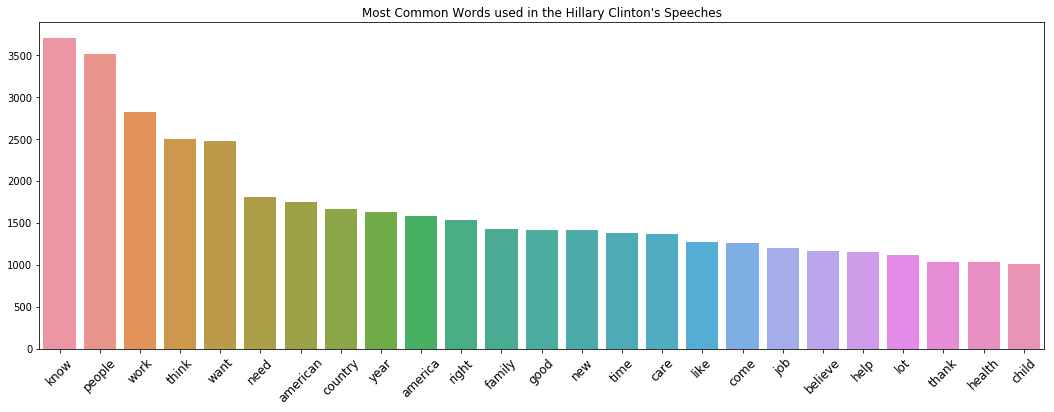

top 25 entities [('America', 1518), ('Iraq', 393), ('Obama', 361), ('the United States', 247), ('New York', 244), ('Iran', 243), ('Donald Trump', 240), ('Congress', 230), ('Iowa', 214), ('New Hampshire', 214), ('Bush', 210), ('Senate', 178), ('Ohio', 174), ('the White House', 164), ('Israel', 159), ('ISIS', 157), ('Florida', 138), ('China', 119), ('Sanders', 114), ('McCain', 113), ('Washington', 109), ('Hillary Clinton', 105), ('Michigan', 104), ('Pennsylvania', 90), ('Social Security', 88)]


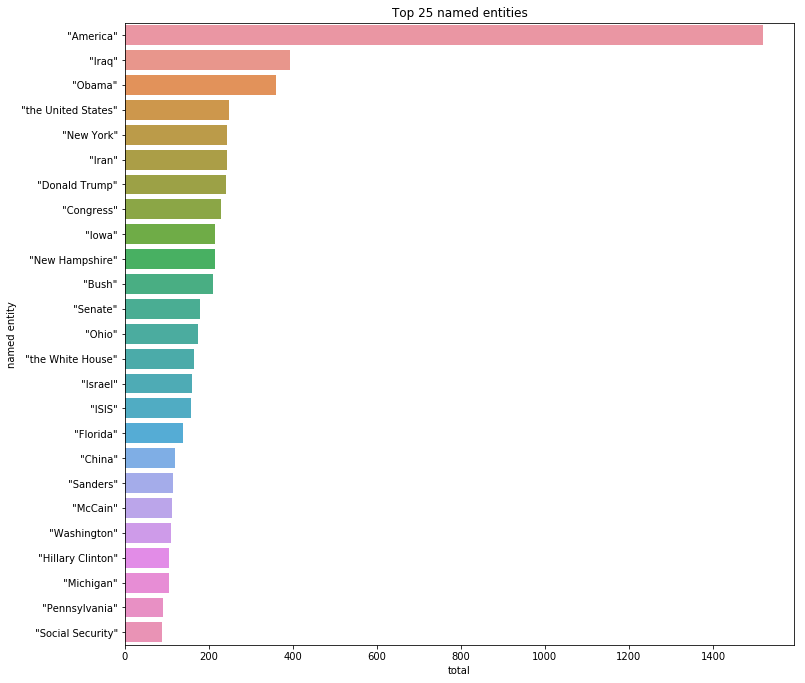

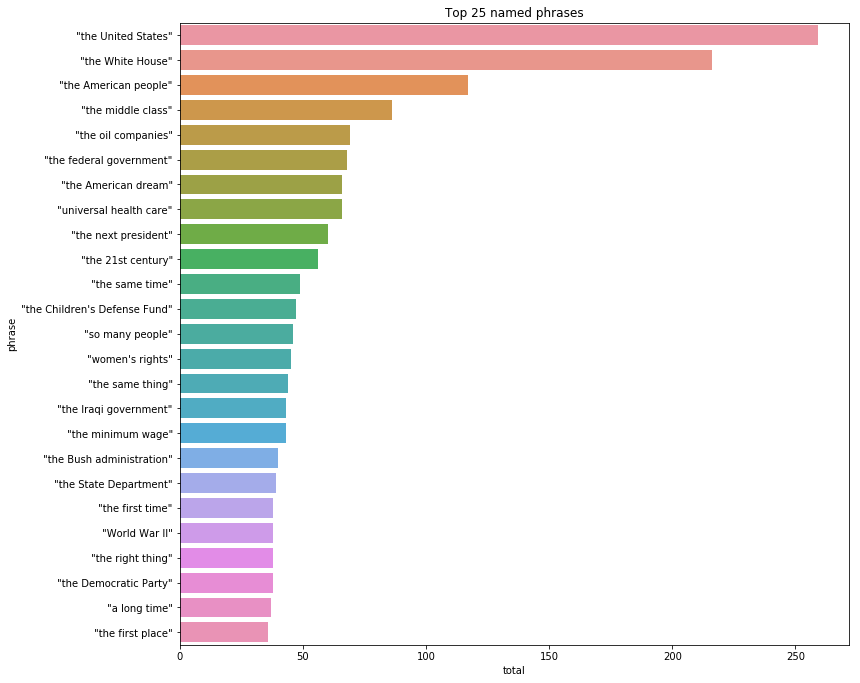

top 25 NOUN [('people', 3384), ('country', 1384), ('time', 1200), ('years', 1130), ('care', 1083), ('lot', 1072), ('health', 951), ('families', 849), ('way', 813), ('world', 803), ('jobs', 787), ('work', 713), ('campaign', 695), ('economy', 680), ('women', 674), ('children', 672), ('government', 640), ('today', 626), ('day', 622), ('family', 565), ('energy', 487), ('year', 486), ('school', 478), ('life', 477), ('election', 464)]


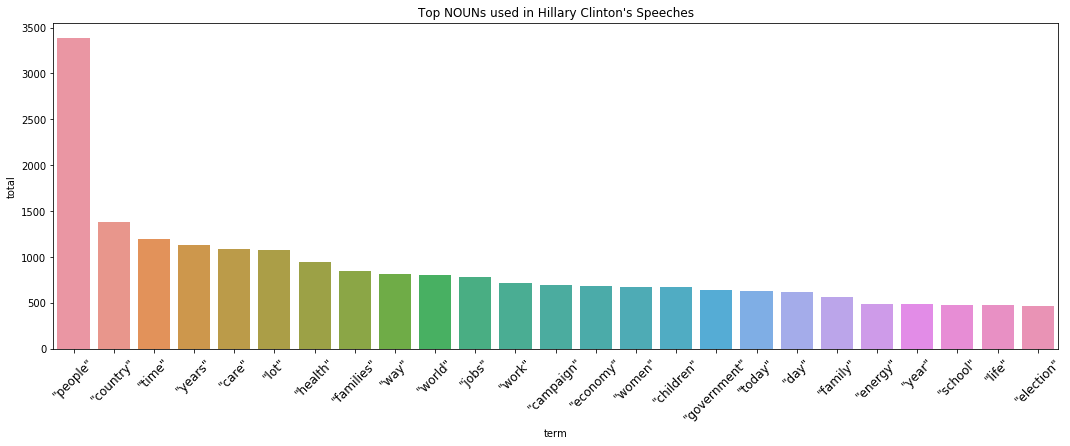

In [393]:
candidate_eda('Hillary Clinton','NOUN',25)

### Bush

[('american', 62), ('thank', 50), ('people', 45), ('america', 44), ('child', 42), ('want', 41), ('work', 37), ('know', 36), ('country', 36), ('good', 34), ('campaign', 33), ('great', 28), ('come', 25), ('school', 24), ('gore', 24), ('time', 23), ('believe', 23), ('jeb', 22), ('party', 21), ('nation', 21), ('tell', 20), ('family', 20), ('love', 20), ('reform', 19), ('texas', 18)]


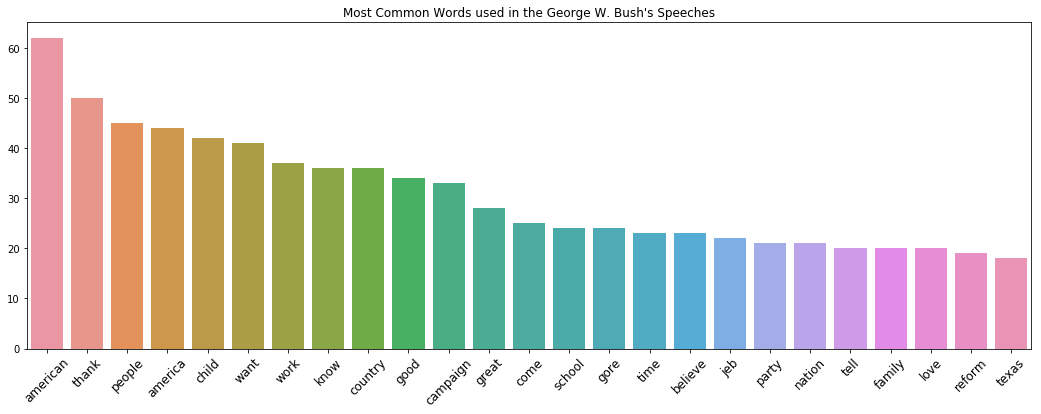

top 25 entities [('America', 42), ('Laura', 16), ('Texas', 16), ('Jeb', 15), ('the United States', 14), ('Gore', 11), ('Washington', 9), ('Al Gore', 8), ('Dick Cheney', 7), ('South Carolina', 7), ('Social Security', 6), ('D.C.', 6), ('the White House', 6), ('Jeb Bush', 6), ('Clinton Gore', 4), ('Florida', 4), ('John', 3), ('House', 3), ('Kerry', 3), ('David', 3), ('Simon Wiesenthal', 2), ('John McCain', 2), ('Lynne', 2), ('Senate', 2), ('Jefferson', 2)]


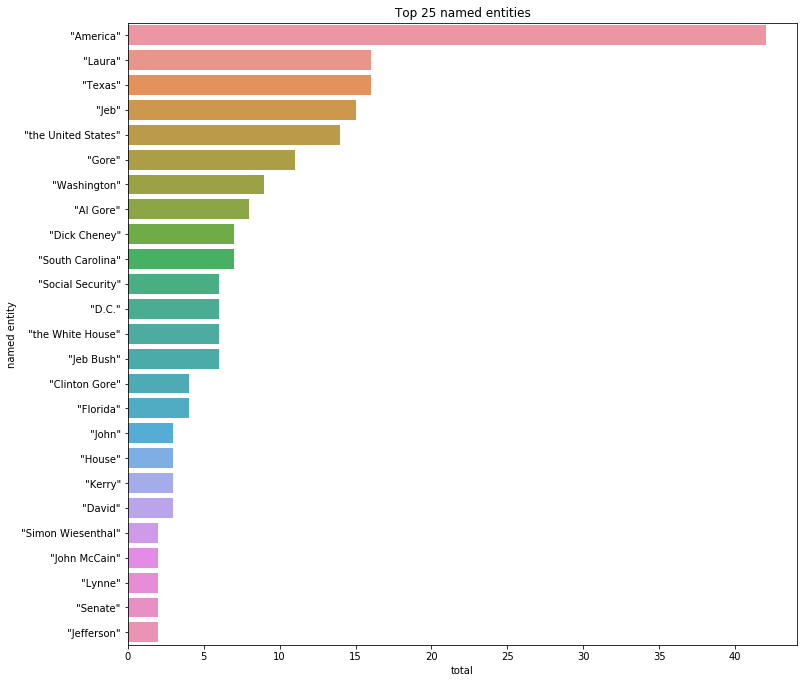

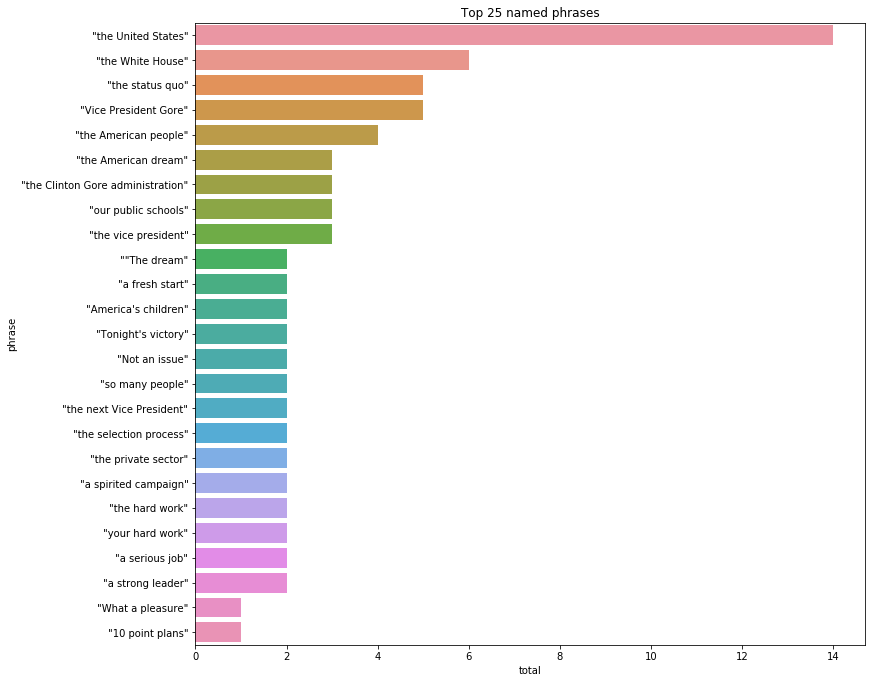

top 25 NOUN [('people', 45), ('country', 35), ('campaign', 30), ('children', 29), ('time', 20), ('schools', 20), ('party', 18), ('nation', 17), ('years', 15), ('family', 14), ('world', 13), ('child', 13), ('work', 13), ('honor', 13), ('education', 12), ('dream', 11), ('life', 11), ('heart', 10), ('today', 10), ('way', 10), ('man', 10), ('plan', 9), ('freedom', 9), ('power', 9), ('message', 9)]


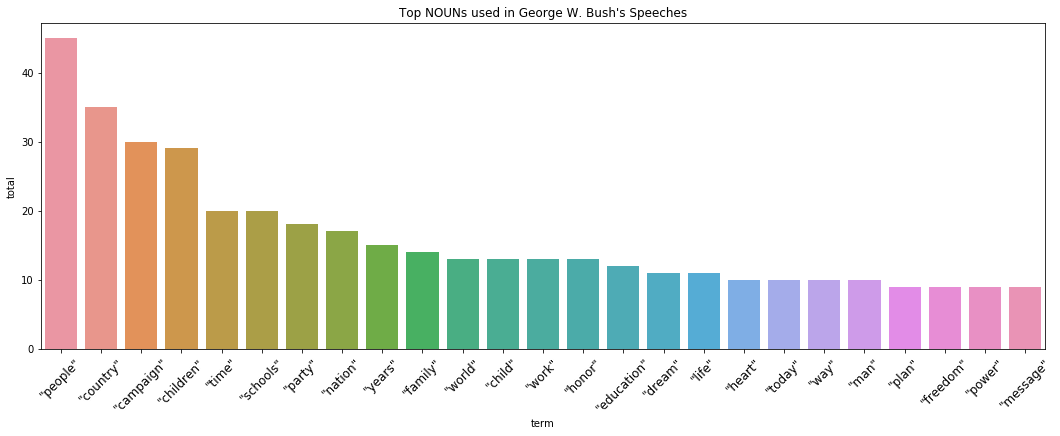

In [630]:
candidate_eda('George W. Bush','NOUN',25)

### Bernie

[('people', 1516), ('country', 923), ('think', 897), ('know', 685), ('right', 616), ('work', 589), ('american', 561), ('campaign', 451), ('want', 431), ('year', 423), ('need', 418), ('percent', 393), ('let', 385), ('good', 382), ('america', 380), ('million', 356), ('talk', 351), ('issue', 342), ('today', 340), ('vote', 334), ('pay', 325), ('time', 317), ('united', 306), ('come', 298), ('believe', 291)]


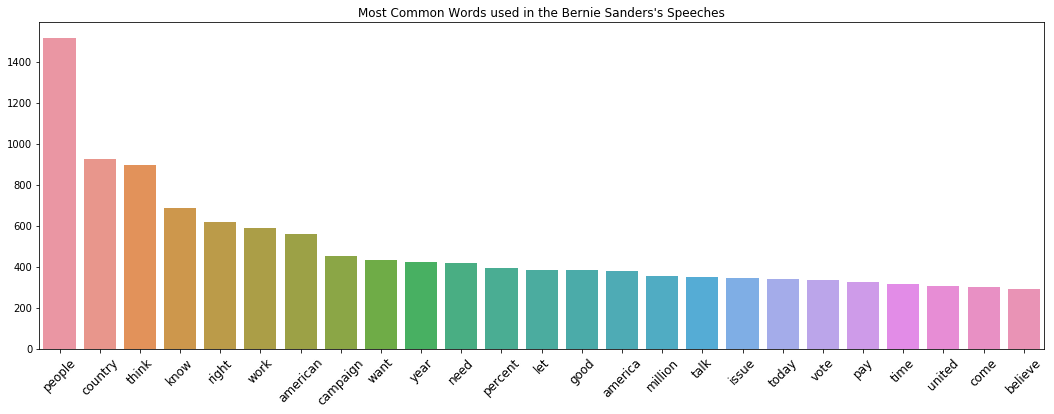

top 25 entities [('America', 307), ('the United States', 167), ('Hillary Clinton', 160), ('ISIS', 129), ('Greece', 111), ('Donald Trump', 111), ('Bernie Sanders', 107), ('Congress', 96), ('Vermont', 77), ('Chris', 69), ('Israel', 65), ('Trump', 64), ('Iraq', 62), ('Obama', 57), ('California', 55), ('Social Security', 50), ('Medicare', 50), ('New Hampshire', 47), ('Senate', 46), ('the United States of America', 46), ('China', 44), ('U.S.', 42), ('the Democratic Party', 42), ('Iowa', 41), ('Iran', 41)]


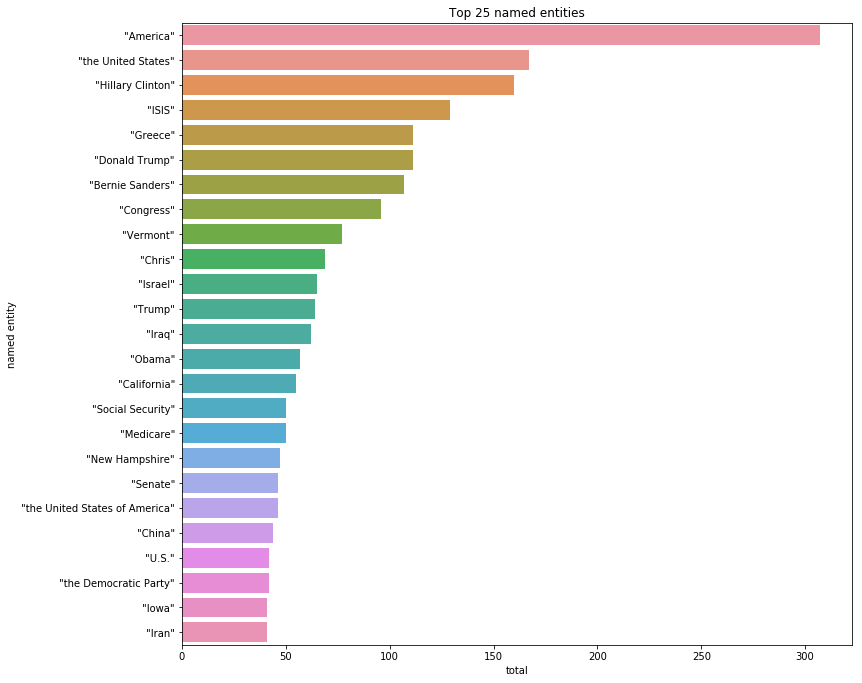

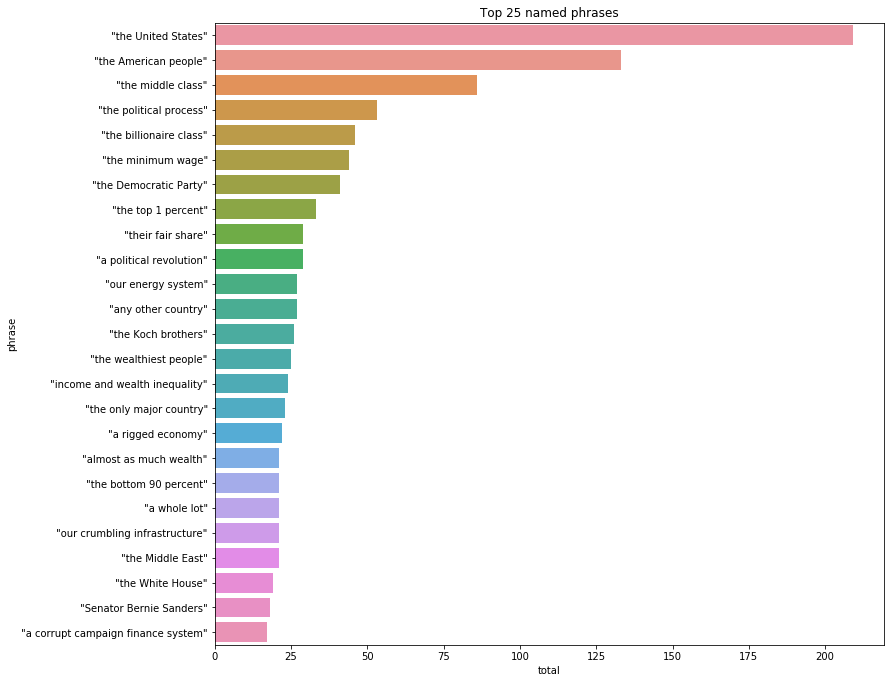

top 25 NOUN [('people', 1465), ('country', 808), ('campaign', 419), ('percent', 393), ('time', 283), ('money', 278), ('today', 276), ('years', 272), ('world', 257), ('system', 243), ('way', 243), ('class', 240), ('millions', 221), ('lot', 217), ('economy', 212), ('income', 198), ('health', 194), ('issue', 188), ('jobs', 178), ('care', 172), ('wealth', 171), ('workers', 166), ('state', 161), ('family', 157), ('government', 156)]


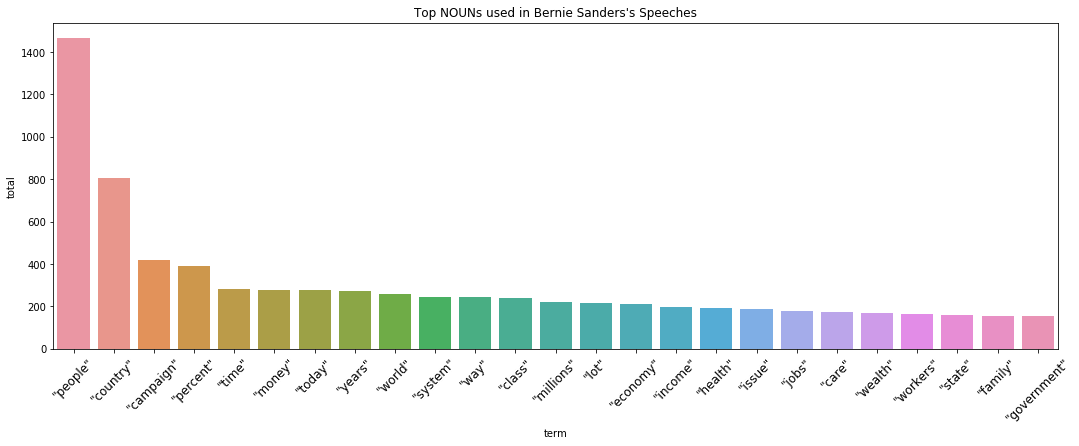

In [635]:
candidate_eda('Bernie Sanders','NOUN',25)

## Classification

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score

### Defining a Custom Transformer

To further clean our text data, we’ll also want to create a custom transformer for removing initial and end spaces and converting text into lower case. Here, we will create a custom predictors class wich inherits the TransformerMixin class. This class overrides the transform, fit and get_parrams methods. We’ll also create a clean_text() function that removes spaces and converts text into lowercase.

In [541]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text


def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower().replace("\n", " ").replace("\r", " ")


### Vectorization Feature Engineering (TF-IDF)

One tool we can use for doing this is called Bag of Words. BoW converts text into the matrix of occurrence of words within a given document. It focuses on whether given words occurred or not in the document, and it generates a matrix that we might see referred to as a BoW matrix or a document term matrix.

We can generate a BoW matrix for our text data by using scikit-learn‘s CountVectorizer. In the code below, we’re telling CountVectorizer to use the custom spacy_tokenizer function we built as its tokenizer, and defining the ngram range we want.

In [454]:
# BoW converts text into the matrix of occurrence of words within a given document. 
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

### Baseline Model (logistic regression)

In [612]:
from sklearn.model_selection import train_test_split

X = campaign_speeches['text'] # the features we want to analyze
ylabels = campaign_speeches['won_nomination'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

#### Creating a Pipeline and Generating the Model


In [614]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

/anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('cleaner', <__main__.predictors object at 0x1a2af36e80>), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngra...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

#### Evaluating the Model


In [615]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.7106299212598425
Logistic Regression Precision: 0.7817679558011049
Logistic Regression Recall: 0.8062678062678063


#### Confusion Matrix

In [616]:
print(metrics.confusion_matrix(y_test,predicted))

[[ 78  79]
 [ 68 283]]


In [617]:
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.53      0.50      0.51       157
           1       0.78      0.81      0.79       351

   micro avg       0.71      0.71      0.71       508
   macro avg       0.66      0.65      0.65       508
weighted avg       0.71      0.71      0.71       508



### Linear SVC Model

In [574]:
class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text

def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in stop_words]
    tokens = [tok for tok in tokens if tok not in punctuations]
    return tokens

In [611]:
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Top negative coefficients: ")
    for feat in topClass1:
        print(feat)
    print("Top positive coefficients: ")
    for feat in topClass2:
        print(feat)

In [618]:
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1, 1))
clf = LinearSVC()
pipe = Pipeline([('cleanText', CleanTextTransformer()),
                 ('vectorizer', vectorizer), ('clf', clf)])


# train
pipe.fit(X_train, y_train)

# test
preds = pipe.predict(X_test)
print("accuracy:", accuracy_score(y_test, preds))
print("Top 10 features used to predict: ")

printNMostInformative(vectorizer, clf, 10)

pipe = Pipeline([('cleanText', CleanTextTransformer()),
                 ('vectorizer', vectorizer)])
transform = pipe.fit_transform(X_train, y_train)
vocab = vectorizer.get_feature_names()

for i in range(len(X_train)):
    s = ""
    indexIntoVocab = transform.indices[transform.indptr[i]                                       :transform.indptr[i+1]]
    numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
    for idx, num in zip(indexIntoVocab, numOccurences):
        s += str((vocab[idx], num))

accuracy: 0.8405511811023622
Top 10 features used to predict: 
Top negative coefficients: 
(-0.15179044074756334, '…')
(-0.09028986865415246, 'solution')
(-0.08400032572118174, 'ready')
(-0.08319534783140124, 'conservative')
(-0.08096661480367458, 'prepare')
(-0.07512219555717083, 'position')
(-0.07138895460214131, 'mayor')
(-0.07055008800306095, 'governor')
(-0.06949889680086418, 'growth')
(-0.06915567975659645, 'excerpt')
Top positive coefficients: 
(0.10114486726270117, 'dole')
(0.09303017544156032, 'promise')
(0.09282575666063829, 'http://www.barackobama.com')
(0.09186748399594581, 'p.m.')
(0.08908817789360353, 'et')
(0.08724242478282941, 'appreciate')
(0.08509677134392195, 'vp')
(0.08053087828553894, 'watch')
(0.07887021796708756, 'parent')
(0.07697729935675204, 'pass')


In [619]:
print(metrics.confusion_matrix(y_test,preds))

[[122  35]
 [ 46 305]]


In [620]:
print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       157
           1       0.90      0.87      0.88       351

   micro avg       0.84      0.84      0.84       508
   macro avg       0.81      0.82      0.82       508
weighted avg       0.84      0.84      0.84       508



In [621]:
printNMostInformative(vectorizer, clf, 1000)

pipe = Pipeline([('cleanText', predictors()), ('vectorizer', bow_vector)])
transform = pipe.fit_transform(X_train, y_train)
vocab = vectorizer.get_feature_names()

for i in range(len(X_train)):
    s = ""
    indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
    numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
    for idx, num in zip(indexIntoVocab, numOccurences):
        s += str((vocab[idx], num))

Top negative coefficients: 
(-0.15179044074756334, '…')
(-0.09028986865415246, 'solution')
(-0.08400032572118174, 'ready')
(-0.08319534783140124, 'conservative')
(-0.08096661480367458, 'prepare')
(-0.07512219555717083, 'position')
(-0.07138895460214131, 'mayor')
(-0.07055008800306095, 'governor')
(-0.06949889680086418, 'growth')
(-0.06915567975659645, 'excerpt')
(-0.06596252902565884, 'reagan')
(-0.061726154026404925, 'barack')
(-0.06133782893485519, 'mandate')
(-0.05899889893100534, 'voice')
(-0.05856002542997731, 'break')
(-0.05751559911623653, 'reality')
(-0.05731826422673455, 'race')
(-0.056752572378773326, 'delegate')
(-0.05518142545125965, 'grateful')
(-0.05344112583563833, 'invisible')
(-0.05298897839728379, '20')
(-0.05288710568717802, 'enjoy')
(-0.05209422580262097, 'seven')
(-0.05178944872985714, 'family')
(-0.051453581432011564, 'poor')
(-0.05077651746333556, 'step')
(-0.04989455635612669, 'warm')
(-0.04920470362796332, 'state')
(-0.04915336072650617, 'bear')
(-0.04909378242

(0.013758968785958673, '21st')
(0.013724485606938177, 'sake')
(0.013722431985248645, 'crazy')
(0.013705079799666692, 'previously')
(0.013704223472882584, 'especially')
(0.013701569091315707, 'stack')
(0.013694629688332488, 'veto')
(0.013678987986901932, 'crown')
(0.013643008872289895, 'vote')
(0.013584310316939317, 'disappointment')
(0.01358427462730254, 'twice')
(0.013533830611240659, 'patience')
(0.013510384952134288, 'giveaway')
(0.013479455238311443, '700')
(0.01347335422037252, 'memorial')
(0.01346413312726814, 'exist')
(0.01346382290844271, 'prediction')
(0.013454812544271125, 'anniversary')
(0.013441437567878878, 'partly')
(0.013411328817218755, 'disappoint')
(0.013397394503788103, 'discussion')
(0.013373461760331691, 'extra')
(0.013325730427290482, 'principle')
(0.013322018301668567, 'civilian')
(0.013307424175994419, 'humility')
(0.01330568740109053, 'square')
(0.013292622585178215, 'lynne')
(0.013281023468772381, 'laura')
(0.01326228637143517, 'fiscal')
(0.013236457758625553,

(0.008043989763254896, 'abortion')
(0.008030381545584107, 'devote')
(0.008026059690886463, 'unleash')


## Party EDA

### Republican Party

In [639]:
def party_eda(party, pos, n):

    party_speeches = campaign_speeches[campaign_speeches.party == party].reset_index(drop=True)

    party_speeches['tokenized_text'] = party_speeches.text.apply(
        lambda x: spacy_tokenizer(x))

    party_tokenized_text = [
        text for text in party_speeches['tokenized_text']]

    party_tokenized_text = ' '.join(party_tokenized_text).split()

    party_counts = Counter(party_tokenized_text)

    party_common_words = [word[0]
                              for word in party_counts.most_common(n)]

    party_common_counts = [word[1]
                               for word in party_counts.most_common(n)]

    print(party_counts.most_common(n))
    fig1 = plt.figure(figsize=(18, 6))
    sns.barplot(x=party_common_words, y=party_common_counts)
    plt.title("Most Common Words used in the {} Party's Speeches".format(party))
    plt.xticks(rotation=45, fontsize=12)
    plt.show()

    nlp.max_length = 1000000000
    party_text = [text for text in party_speeches.text]
    party_text = ' '.join(party_text).strip()

    party_nlp = nlp(party_text)
    party_ents = party_nlp.ents

    entities = []
    # named entities
    for ent in party_ents:
        # Print the entity text and its label
        if ent.label_ == 'GPE' or ent.label_ == 'PERSON' or ent.label_ == 'LOC' or ent.label_ == 'ORG' or ent.label_ == 'EVENT':
            entities.append(str(ent))

    entities = [word for word in entities if word.lower() not in stop_words]

    counter = Counter(entities)
    result = counter.most_common(n)

    print("top {} entities {}".format(n, result))
    fig2 = plt.figure(figsize=(12, 18))

    sns.barplot([i[1] for i in result], ["\"{}\"".format(i[0])
                                         for i in result])
    plt.ylabel('named entity')
    plt.xlabel('total')
    plt.xticks(rotation='horizontal', fontsize=10)
    plt.title("Top {} named entities".format(n))
    plt.subplots_adjust(bottom=0.40)
    plt.show()

    phrases = [np.text for np in party_nlp.noun_chunks if len(np)>2]
    phrases = [word for word in phrases if word.lower() not in stop_words]

    counter1 = Counter(phrases)
    result1 = (counter1.most_common(n))

    fig3 = plt.figure(figsize=(12, 18))
    sns.barplot([i[1] for i in result1], ["\"{}\"".format(i[0])
                                          for i in result1])
    plt.ylabel('phrase')
    plt.xlabel('total')
    plt.xticks(rotation='horizontal', fontsize=10)
    plt.title("Top {} named phrases".format(n))
    plt.subplots_adjust(bottom=0.40)
    plt.show()

    positions=[]
    for token in party_nlp:
        # ignore stop words
        
        if token.pos_ == pos:
            positions.append(token.text)
    
    positions= [word for word in positions if word.lower() not in stop_words]
    # sort by values, but before get only those keys where value > 1;
    # I want lemmas that appear more than one lastly, get the first n results
    counter2 = Counter(positions)
    result2 = (counter2.most_common(n))

    print("top {} {} {}".format(n,pos, result2))
    fig4 = plt.figure(figsize=(18, 6))
    sns.barplot(["\"{}\"".format(i[0])
                 for i in result2], [i[1] for i in result2])
    plt.title("Top {}s used in the {} Party's Speeches".format(pos, party))
    plt.ylabel('total')
    plt.xlabel('term')
    plt.xticks(rotation=45, fontsize=12)
    plt.show()

[('people', 7832), ('american', 6767), ('america', 6493), ('know', 5784), ('country', 5219), ('want', 4724), ('year', 4124), ('time', 3967), ('job', 3956), ('government', 3924), ('think', 3877), ('great', 3698), ('work', 3678), ('come', 3478), ('right', 3469), ('good', 3402), ('need', 3226), ('world', 3025), ('new', 2981), ('like', 2833), ('thank', 2692), ('thing', 2646), ('way', 2643), ('believe', 2599), ('state', 2539)]


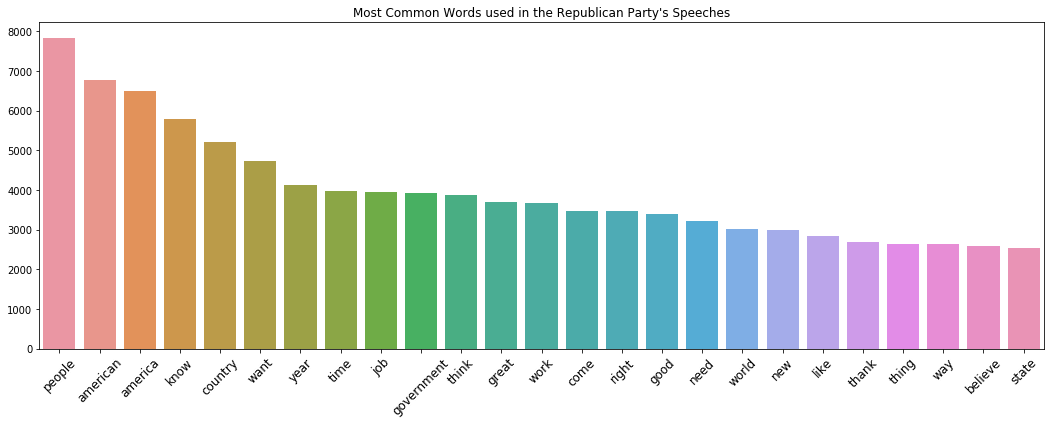

top 25 entities [('America', 5845), ('Obama', 1728), ('Washington', 1298), ('the United States', 1187), ('Iraq', 976), ('Congress', 848), ('Hillary Clinton', 783), ('Iran', 670), ('Israel', 537), ('China', 485), ('Medicare', 369), ('Florida', 353), ('Obamacare', 350), ('Michigan', 333), ('U.S.', 332), ('Barack Obama', 329), ('Hillary', 326), ('Senate', 321), ('ISIS', 306), ('Afghanistan', 298), ('the Middle East', 283), ('MR', 277), ('Ohio', 276), ('Bill Clinton', 272), ('the White House', 270)]


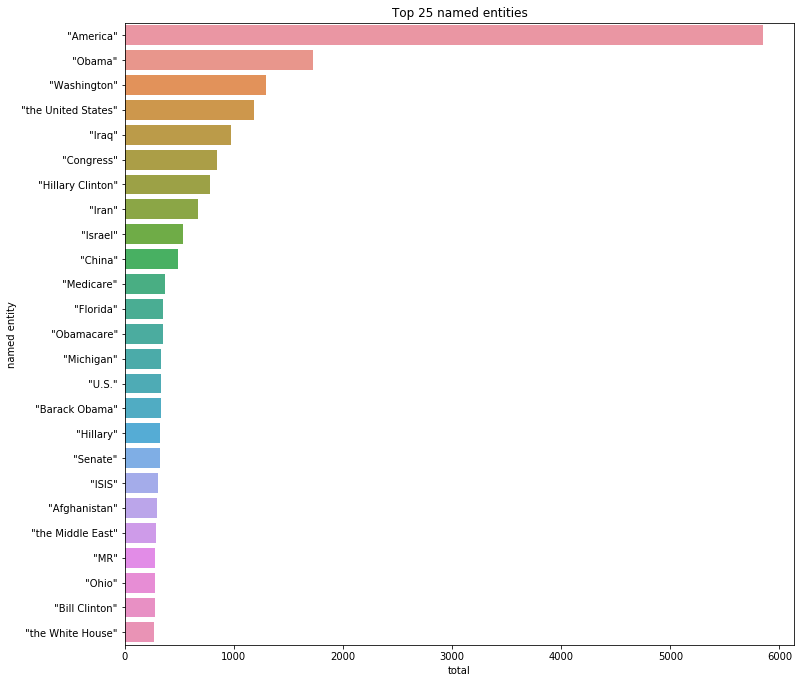

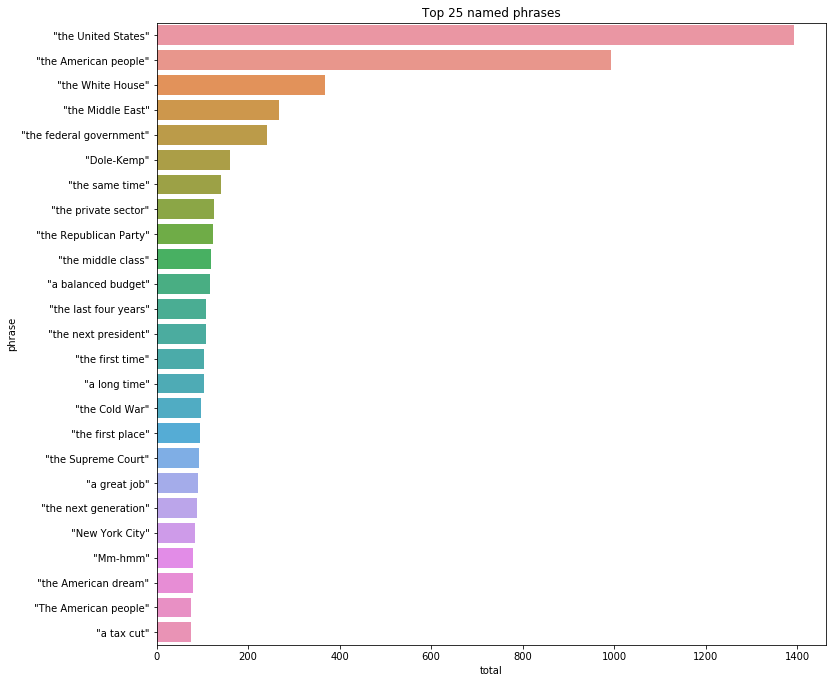

top 25 NOUN [('people', 7543), ('country', 4682), ('government', 3654), ('time', 3252), ('world', 2784), ('years', 2773), ('jobs', 2666), ('way', 2305), ('tax', 2259), ('economy', 1814), ('nation', 1785), ('today', 1719), ('money', 1709), ('taxes', 1669), ('things', 1642), ('lot', 1483), ('state', 1482), ('life', 1449), ('percent', 1403), ('campaign', 1354), ('year', 1339), ('business', 1315), ('energy', 1308), ('children', 1294), ('cheers', 1292)]


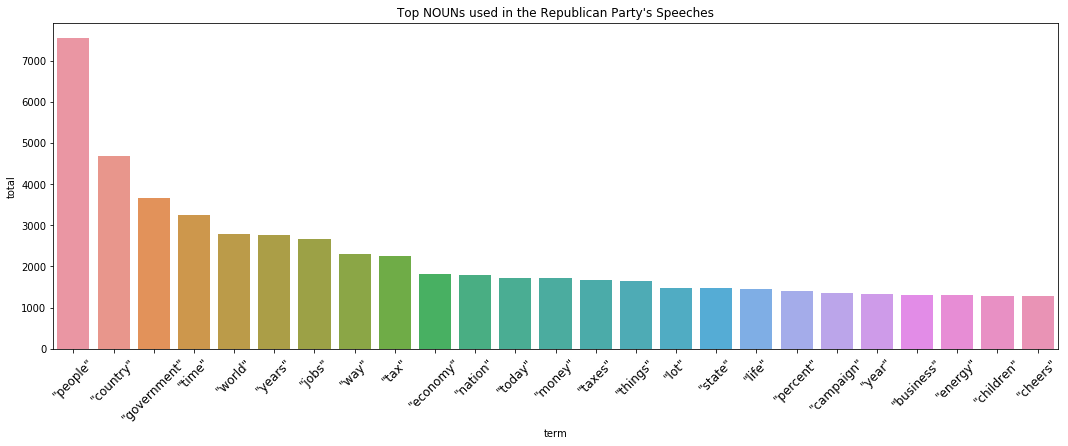

In [637]:
party_eda('Republican','NOUN',25)

### Democratic Party

[('people', 12598), ('know', 11001), ('work', 10886), ('american', 10142), ('america', 9478), ('want', 8703), ('year', 8625), ('country', 8451), ('think', 8009), ('need', 7926), ('job', 7313), ('time', 6884), ('right', 6496), ('good', 6113), ('new', 6078), ('come', 5691), ('family', 5219), ('believe', 5043), ('like', 5014), ('care', 4986), ('change', 4626), ('help', 4545), ('pay', 4533), ('health', 4393), ('way', 4382)]


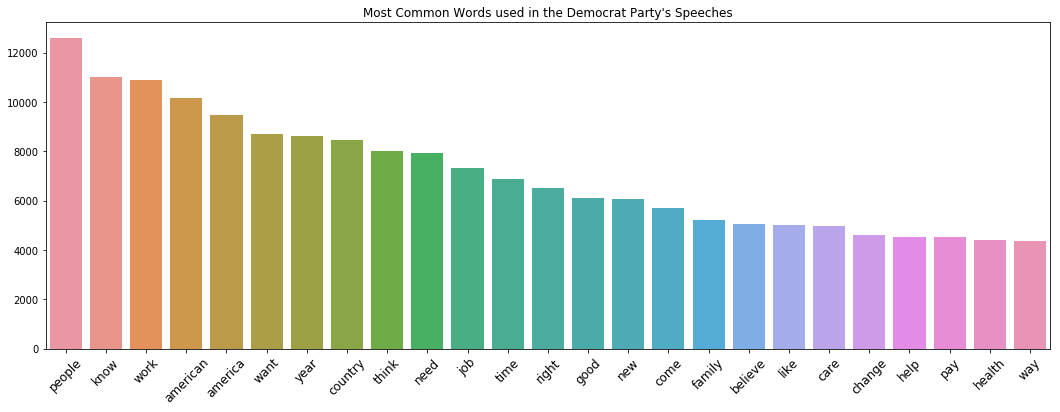

In [ ]:
party_eda('Democrat','NOUN',25)

## Party Models

### Republican Party

In [622]:
republican_speeches = campaign_speeches[campaign_speeches.party == 'Republican']

In [593]:
republican_speeches.shape

(695, 9)

In [626]:
from sklearn.model_selection import train_test_split

X = republican_speeches['text'] # the features we want to analyze
ylabels = republican_speeches['won_nomination'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [627]:
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1, 1))
clf = LinearSVC()
pipe = Pipeline([('cleanText', CleanTextTransformer()),
                 ('vectorizer', vectorizer), ('clf', clf)])


# train
pipe.fit(X_train, y_train)

# test
preds = pipe.predict(X_test)
print("accuracy:", accuracy_score(y_test, preds))
print("Top 10 features used to predict: ")

printNMostInformative(vectorizer, clf, 25)

pipe = Pipeline([('cleanText', CleanTextTransformer()),
                 ('vectorizer', vectorizer)])
transform = pipe.fit_transform(X_train, y_train)
vocab = vectorizer.get_feature_names()

for i in range(len(X_train)):
    s = ""
    indexIntoVocab = transform.indices[transform.indptr[i]                                       :transform.indptr[i+1]]
    numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
    for idx, num in zip(indexIntoVocab, numOccurences):
        s += str((vocab[idx], num))

accuracy: 0.8660287081339713
Top 10 features used to predict: 
Top negative coefficients: 
(-0.11817569259179687, '…')
(-0.07016180232928065, 'john')
(-0.0681009397701109, 'conservative')
(-0.06298415694728579, 'family')
(-0.052588341764205605, 'think')
(-0.04932770868032413, 'washington')
(-0.04738387782799643, 'governor')
(-0.046650623644783014, 'water')
(-0.046565122697993525, 'stand')
(-0.046038398239288056, 'need')
(-0.04529029885132337, 'solution')
(-0.04408270351819436, 'right')
(-0.04097798691430128, 'limit')
(-0.04027243429519162, 'iran')
(-0.039915525248280896, 'cause')
(-0.039273966558132, 'alaska')
(-0.038807103371595916, 'live')
(-0.03741886721181462, 'state')
(-0.0367812029401666, 'beat')
(-0.03625096400431961, 'florida')
(-0.03499481639856159, 'reagan')
(-0.034207350483185524, 'continue')
(-0.033620435042881, 'particularly')
(-0.03355820473216739, 'repeal')
(-0.033006279019232816, 'banner')
Top positive coefficients: 
(0.07324599776290441, 'dole')
(0.06544436144817324, '

In [628]:
print(metrics.confusion_matrix(y_test,preds))

print(metrics.classification_report(y_test,preds))

[[ 60  13]
 [ 15 121]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        73
           1       0.90      0.89      0.90       136

   micro avg       0.87      0.87      0.87       209
   macro avg       0.85      0.86      0.85       209
weighted avg       0.87      0.87      0.87       209



### Democratic Party

In [594]:
democrat_speeches=campaign_speeches[campaign_speeches.party=='Democrat']

In [595]:
democrat_speeches.shape

(996, 9)

In [623]:
from sklearn.model_selection import train_test_split

X = democrat_speeches['text'] # the features we want to analyze
ylabels = democrat_speeches['won_nomination'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [624]:
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1, 1))
clf = LinearSVC()
pipe = Pipeline([('cleanText', CleanTextTransformer()),
                 ('vectorizer', vectorizer), ('clf', clf)])


# train
pipe.fit(X_train, y_train)

# test
preds = pipe.predict(X_test)
print("accuracy:", accuracy_score(y_test, preds))
print("Top 10 features used to predict: ")

printNMostInformative(vectorizer, clf, 25)

pipe = Pipeline([('cleanText', CleanTextTransformer()),
                 ('vectorizer', vectorizer)])
transform = pipe.fit_transform(X_train, y_train)
vocab = vectorizer.get_feature_names()

for i in range(len(X_train)):
    s = ""
    indexIntoVocab = transform.indices[transform.indptr[i]                                       :transform.indptr[i+1]]
    numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
    for idx, num in zip(indexIntoVocab, numOccurences):
        s += str((vocab[idx], num))

accuracy: 0.8929765886287625
Top 10 features used to predict: 
Top negative coefficients: 
(-0.0664112232570151, 'solution')
(-0.056911858877063834, 'hillary')
(-0.05417665685730295, 'invisible')
(-0.05270885531248571, 'people')
(-0.05128807547052329, 'veteran')
(-0.04770086987227114, 'democrat')
(-0.04664718457604153, 'tonight')
(-0.04660167283699744, 'john')
(-0.04463761597762245, 'congress')
(-0.04446212669644939, 'middle')
(-0.04439952258290208, 'office')
(-0.04406975529201367, 'state')
(-0.04331166008533195, 'end')
(-0.04119174577590599, 'deliver')
(-0.03874587437999715, 'climate')
(-0.03773383343676113, 'overtime')
(-0.03741400812428459, 'poor')
(-0.03694124355332044, 'delegate')
(-0.03609506897864032, 'sen')
(-0.03586038373865177, 'worry')
(-0.03577239272709201, 'majority')
(-0.03576146544470021, 'cover')
(-0.03532646347116185, 'government')
(-0.034865657113725634, 'position')
(-0.034257357760462924, 'leave')
Top positive coefficients: 
(0.07414772952772675, 'choose')
(0.0709327

In [625]:
print(metrics.confusion_matrix(y_test, preds))

print(metrics.classification_report(y_test, preds))

[[ 74  22]
 [ 10 193]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        96
           1       0.90      0.95      0.92       203

   micro avg       0.89      0.89      0.89       299
   macro avg       0.89      0.86      0.87       299
weighted avg       0.89      0.89      0.89       299

